In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

import scipy.linalg as linalg
from scipy.linalg import ldl
import scipy.sparse.linalg
import scipy.sparse

import matplotlib.animation as animation
import matplotlib.cm as cm


#%matplotlib notebook

In [2]:
omega_0 = 0
theta_0 = 0.2
g = l = 9.81
m = 1
n = 1200
h = 0.05
omega_d = 2/3
q = 0.5
Fd = 0.5



In [3]:
def diff_omega(theta_i, omega_i, t):
    return -(g/l)*np.sin(theta_i) - q*omega_i + Fd*np.sin(t*omega_d)

def diff_theta(omega_i):
    return omega_i

def f(y, t):
    return np.array([diff_omega(y[1], y[0], t), diff_theta(y[0])])

In [4]:


def runge_kutta(y, h, n, t): 
    for i in range(n-1):
        y[i+1] = rk_step(y, f, h, i, t)
    return y

def rk_step(y, f, h, i, t):
    k1 = h * f(y[i], t[i])
    k2 = h * f(y[i] + k1/2, t[i])
    k3 = h * f(y[i] + k2/2, t[i])
    k4 = h * f(y[i] + k3, t[i])
    
    return y[i] + k1/6 + k2/3 + k3/3 + k4/6



In [5]:
def simulate():
    y = np.zeros((n,2))
    y[0, 1] = theta_0
    y[0, 0] = omega_0
    
    t = np.arange(0, n*h, h)
    y = runge_kutta(y, h, n, t)
    y[:,1] += np.pi 
    y[:,1] =  (y[:,1] + 2*np.pi)% (2*np.pi)
    y[:,1] -= np.pi
    return y, t

In [6]:


def plot_this(y_1, y_2, t, labels, fig_name):
    plt.plot(t, y_1, color='k', linestyle='-', label=labels[0])
    plt.plot(t, y_2, color='k', linestyle=':', label=labels[1])
    
    plt.xlabel(labels[2])
    plt.ylabel(labels[3])
    plt.legend(bbox_to_anchor=(1.0, 1))
    plt.title(fig_name)

    plt.show()

def plot_dots(y_1, y_2, t, labels, fig_name):
    plt.plot(t, y_1, ".", color = 'k', label=labels[0], markersize=2)
    plt.plot(t, y_2, linestyle="dashdot", color = 'k', label=labels[1], markersize=2)
    plt.xlabel(labels[2])
    plt.ylabel(labels[3])
    plt.legend(bbox_to_anchor=(1.0,1))
    plt.title(fig_name)
    plt.show()



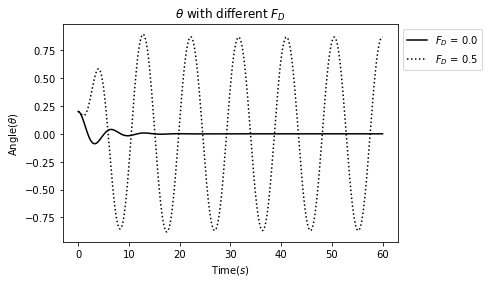

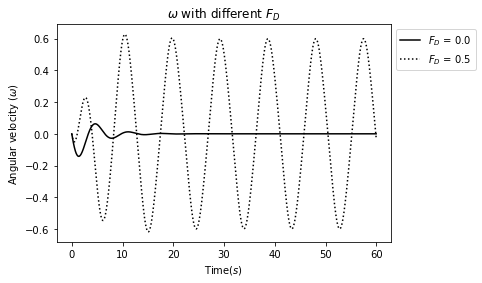

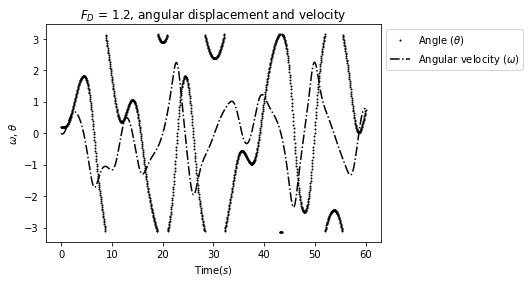

In [7]:
Fd = 0
y_0, t_0 = simulate()

Fd = 0.5
y_1, t_1 = simulate()

Fd = 1.2
y_2, t_2 = simulate()

labels = ['$F_D$ = 0.0', '$F_D$ = 0.5', 'Time($s$)', r'Angle($\theta$)']
fig_name = r'$\theta$ with different $F_D$'
plot_this(y_0[:,1], y_1[:,1], t_1, labels, fig_name)

fig_name = r'$\omega$ with different $F_D$'
labels[3] = r'Angular velocity ($\omega$)'
plot_this(y_0[:,0], y_1[:,0], t_1, labels, fig_name)

labels = [r'Angle ($\theta$)', r'Angular velocity ($\omega$)', 'Time($s$)', r'$\omega$, $\theta$']
fig_name = r'$F_D$ = 1.2, angular displacement and velocity'
plot_dots(y_2[:,1], y_2[:,0], t_2, labels, fig_name)

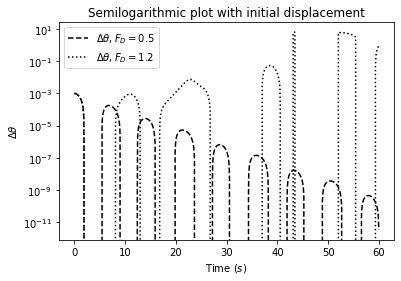

In [8]:
theta_0 += 0.001

Fd = 0.5
y_3, t_3 = simulate()

Fd = 1.2
y_4, t_4 = simulate()

plt.semilogy(t_3, y_3[:,1] - y_1[:,1], color = 'k', linestyle = '--', label=r"$\Delta \theta , F_D = 0.5$")
plt.semilogy(t_4, y_4[:,1] - y_2[:,1], color = 'k', linestyle = ':', label = r'$\Delta \theta, F_D = 1.2$')
plt.xlabel("Time ($s$)")
plt.ylabel(r"$\Delta \theta$")
plt.title('Semilogarithmic plot with initial displacement')
plt.legend()
plt.show()

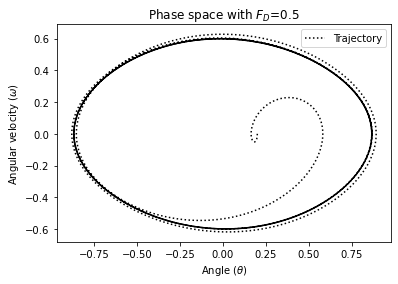

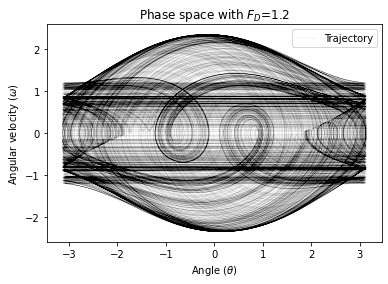

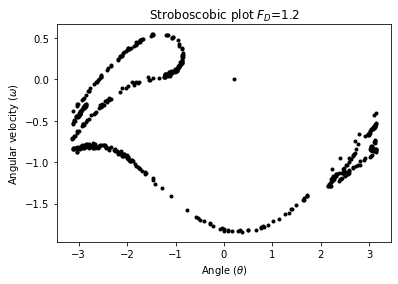

In [9]:
n = 100000
y_4, t_4 = simulate()

#Phase space plots
plt.plot(y_3[:,1], y_3[:,0], color = 'k', label='Trajectory', linestyle = ':')
plt.xlabel(r'Angle ($\theta$)') 
plt.ylabel(r'Angular velocity ($\omega$)')
plt.title('Phase space with $F_D$=0.5')
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.show()

plt.plot(y_4[:,1], y_4[:,0], color = 'k', label='Trajectory', linestyle = '-', linewidth=0.05)
plt.xlabel(r'Angle ($\theta$)') 
plt.ylabel(r'Angular velocity ($\omega$)')
plt.title('Phase space with $F_D$=1.2')
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.show()

#Stroboscobic plot
indexes_4 = np.where(t_4%(2*np.pi/omega_d) < h)

plt.plot(y_4[indexes_4, 1], y_4[indexes_4, 0], ".", color = 'k')
plt.xlabel(r'Angle ($\theta$)') 
plt.ylabel(r'Angular velocity ($\omega$)')
plt.title('Stroboscobic plot $F_D$=1.2')
plt.show()